<!--NAVIGATION-->
< [自定义matplotlib：配置和样式单](04.11-Settings-and-Stylesheets.ipynb) | [目录](Index.ipynb) | [使用Basemap创建地理位置图表](04.13-Geographic-Data-With-Basemap.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Three-Dimensional Plotting in Matplotlib

# 在matplotlib中创建三维图表

> Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

Matplotlib最开始被设计为仅支持二维的图表。到1.0版本发布左右，一些三维图表的工具在二维展示的基础上被创建了出来，结果就是Matplotlib提供了一个方便的（同时也是有限的）的可用于三维数据可视化的一套工具。三维图表可以使用载入`mplot3d`工具包来激活，这个包会随着Matplotlib自动安装：

In [1]:
from mpl_toolkits import mplot3d

> Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

一旦模块被导入，三维axes就可以像其他普通axes一样通过关键字参数`projection='3d'`来创建：

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

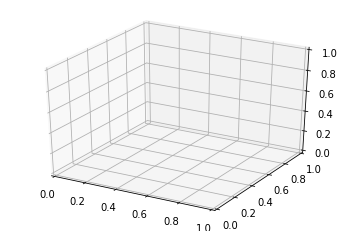

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

> With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

三维axes激活后，我们可以在上面绘制不同的三维图表类型。三维图表在notebook中使用交互式图表展示会优于使用静态展示；回忆我们前面介绍过，你可以使用`%matplotlib notebook`而不是`%matplotlib inline`来激活交互式展示模式。

## Three-dimensional Points and Lines

## 三维的点和线

> The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

三维图表中最基础的是使用(x, y, z)坐标定义的一根线或散点的集合。前面介绍过普通的二维图表，作为类比，使用`ax.plot3D`和`ax.scatter3D`函数可以创建三维折线和散点图。这两个函数的签名与二维的版本基本一致，你可以参考[简单折线图](04.01-Simple-Line-Plots.ipynb)和[简单散点图](04.02-Simple-Scatter-Plots.ipynb)来复习一下这部分的内容。下面我们绘制一个三维中的三角螺旋，在线的附近在绘制一些随机的点：

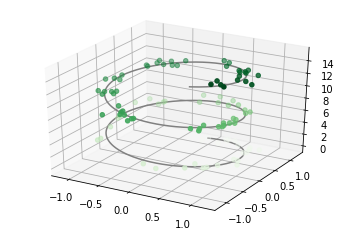

In [9]:
ax = plt.axes(projection='3d')

# 三维螺旋线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

> Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

注意默认情况下，图中的散点会有透明度的区别，用于体现在图中散点的深度。虽然三维效果在静态图像中难以显示，你可以使用交互式的视图来获得更佳的三维直观效果。

## Three-dimensional Contour Plots

## 三维轮廓图

> Analogous to the contour plots we explored in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb), ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

类似于我们在[密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb)中介绍的内容，`mplot3d`也包含着能够创建三维浮雕图像的工具。就像二维的`ax.contour`图表，`ax.contour3D`要求输入数据的格式是二维普通网格上计算得到的Z轴的数据值。下面我们展示一个三维的正弦函数轮廓图：

In [10]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

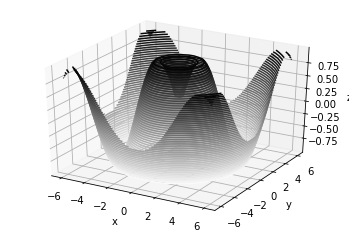

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

> Sometimes the default viewing angle is not optimal, in which case we can use the ``view_init`` method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

有时候默认的视角角度不是最理想的，在这种情况下我们可以使用`view_init`函数来设置水平角和方位角。在下面的例子中，我们使用的是60°的水平角（即以60°俯视x-y平面）和35°的方位角（即将z轴逆时针旋转35°）：

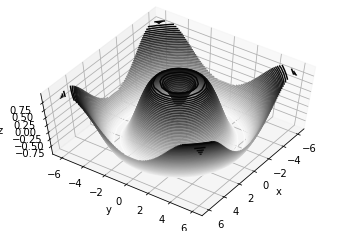

In [12]:
ax.view_init(60, 35)
fig

> Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

同样，注意到当使用Matplotlib交互式展示是，这样的旋转可以通过鼠标点击和拖拽来实现。

## Wireframes and Surface Plots

## 框线图和表面图

> Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe:

使用网格数据生成的三维图表还有框线图和表面图。这两种图表将网格数据投射到特定的三维表面，能够使得结果图像非常直观和具有说服力。下面是一个框线图的例子：

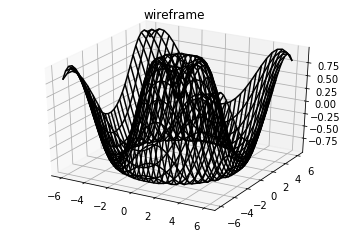

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

> A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

表面图类似框线图，区别在于每个框线构成的多边形都使用颜色进行了填充。添加色图用于填充多边形能够让图形表面展示出来：

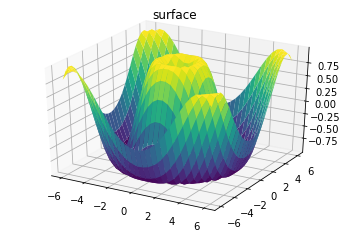

In [14]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

> Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

注意虽然每个颜色填充的表面都是二维的，但是表面的边缘不需要是直线构成的。下面的例子使用`surface3D`绘制了一个部分极坐标网格，能够让我们切入到函数内部观察效果：

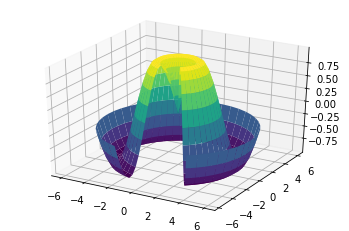

In [15]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Surface Triangulations

## 表面三角剖分

> For some applications, the evenly sampled grids required by the above routines is overly restrictive and inconvenient.
In these situations, the triangulation-based plots can be very useful.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

在一些应用场合中，上面的这种均匀网格绘制的图表方式太过于局限和不方便。在这些情况下，三角剖分的图表可以派上用场。如果我们并不是使用笛卡尔坐标系或极坐标系的网格来绘制三维图表，而是使用一组随机的点来绘制三维图表呢？

In [16]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

> We could create a scatter plot of the points to get an idea of the surface we're sampling from:

有了上面的数据之后，我们可以使用它们来绘制一张散点图表现出样本所在表面的情况：

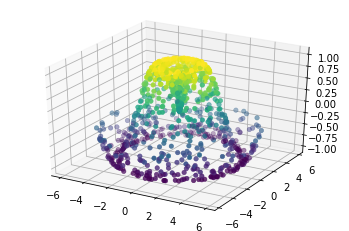

In [17]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

> This leaves a lot to be desired.
The function that will help us in this case is ``ax.plot_trisurf``, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

上图并未形象的表示出表面情况。这种情况下我们可以使用`ax.plot_trisurf`函数，它能首先根据我们的数据输入找到各点内在的三角函数形式，然后绘制表面（注意的是这里的x，y，z是一维的数组）：

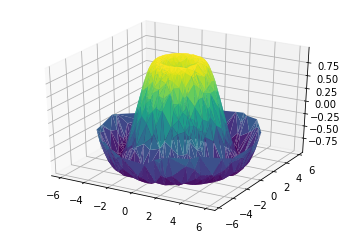

In [18]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

> The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

上图的结果很显然没有使用网格绘制表面图那么清晰，但是对于我们并不是使用函数构建数据样本（数据样本通常来自真实世界的采样）的情况下，这能提供很大的帮助。例如我们下面会看到，能使用这种方法绘制一条三维的莫比乌斯环。

### Example: Visualizing a Möbius strip

### 例子：绘制莫比乌斯环

> A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
Topologically, it's quite interesting because despite appearances it has only a single side!
Here we will visualize such an object using Matplotlib's three-dimensional tools.
The key to creating the Möbius strip is to think about it's parametrization: it's a two-dimensional strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

莫比乌斯环是使用一条纸条，一端翻折后与另一端粘起来形成的环形。在拓扑学中这是非常有趣的一个形状，因为它只有一个面。我们下面使用Matplotlib的三维工具绘制莫比乌斯环。创建莫比乌斯环的关键在于能参数化它：莫比乌斯环是一个二维的环状结构，因此我们需要两个特定的维度。一个我们称为$\theta$，取值范围是$0 \to 2\pi$表示整个环状，还有一个称为$w$，取值范围是$-1 \to 1$表示纸带的宽度：

In [19]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

> Now from this parametrization, we must determine the *(x, y, z)* positions of the embedded strip.

有了这两个参数之后，我们需要确定莫比乌斯环上*(x, y, z)*坐标的位置。

> Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we've called $\theta$), while the other is the twisting of the strip about its axis (we'll call this $\phi$). For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

仔细思考一下，我们会发现在莫比乌斯环上有两个自转发生：一个是纸带绕环形中央位置的旋转（我们称为$\theta$），另一个纸带绕着中间轴线的旋转（我们称为$\phi$）。纸带中央位置旋转一整圈$2\pi$时，纸带绕中间轴线旋转刚好半圈$\pi$，我们将整个旋转均匀分布在纸带上时，就会有$\Delta\phi = \frac{\Delta\theta}{2}$。

In [20]:
phi = 0.5 * theta

> Now we use our recollection of trigonometry to derive the three-dimensional embedding.
We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

现在我们已经有了所有需要获得三维坐标值的参数了。我们定义$r$为每个坐标点距离环形中间的位置，使用它来计算最终$(x, y, z)$三维坐标系的坐标值：

In [21]:
# r是坐标点距离环形中心的距离值
r = 1 + w * np.cos(phi)
# 利用简单的三角函数知识算得x，y，z坐标值
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

> Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation *within the underlying parametrization*, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.
This can be accomplished as follows:

最后，为了绘制对象，我们必须保证三角剖分是正确的。实现这个最好的方法是在底层的参数上面实现三角剖分，最后让Matplotlib将这个三角剖分投射到三维空间中形成莫比乌斯环。下面的代码最终绘制图形：

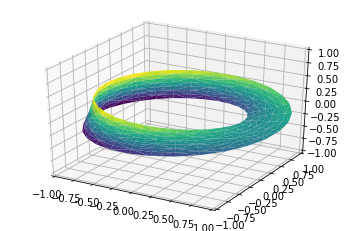

In [22]:
# 在底层参数的基础上进行三角剖分
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

> Combining all of these techniques, it is possible to create and display a wide variety of three-dimensional objects and patterns in Matplotlib.

结合这些技巧，能够为你提供在Matplotlib创建和展现大量三维对象和模式的能力。

<!--NAVIGATION-->
< [自定义matplotlib：配置和样式单](04.11-Settings-and-Stylesheets.ipynb) | [目录](Index.ipynb) | [使用Basemap创建地理位置图表](04.13-Geographic-Data-With-Basemap.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
